In [7]:
%matplotlib inline
from keras.models import load_model
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
import skimage.filters
from keras import backend as K

In [8]:
X = []
Y = []
for img_name in glob.glob("img/data/test/*/*.png"):
    img = image.load_img(img_name, target_size=(80, 80))
    X.append(image.img_to_array(img) / 255.)
    img_path, _ = os.path.split(img_name)
    Y.append(os.path.split(img_path)[1])
X = np.array(X)
model = load_model("coins_model.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy')

/usr/local/lib/python3.5/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


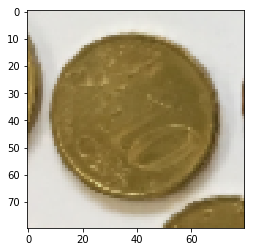

In [24]:
plt.imshow(skimage.filters.gaussian(X[45],0.5))
plt.show()

In [ ]:
### predict in batches
predictions = np.zeros(X.shape[0])
for ix in range(0,X.shape[0],2):
    predictions[ix:ix+2] = model.predict_classes(X[ix:ix+2])

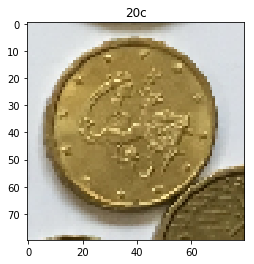

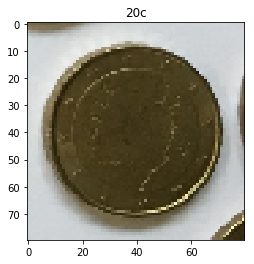

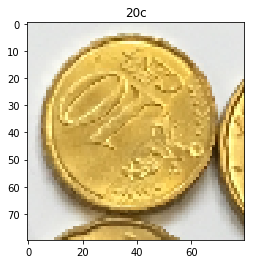

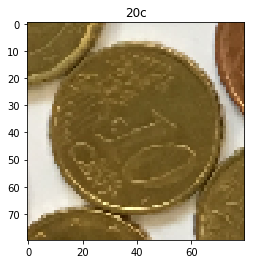

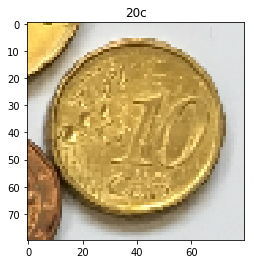

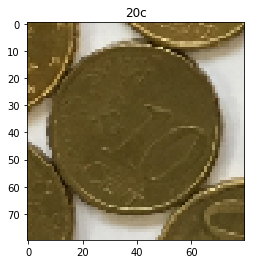

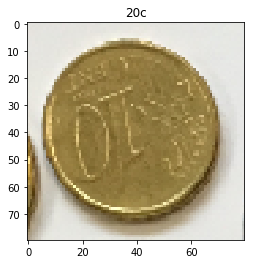

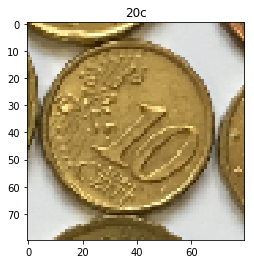

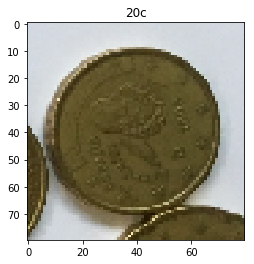

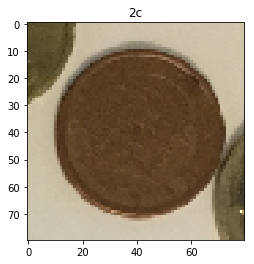

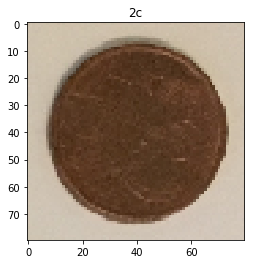

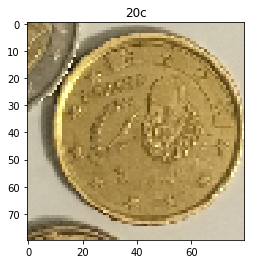

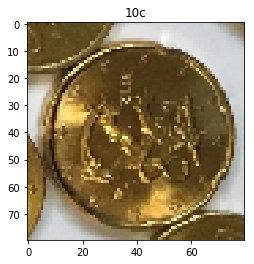

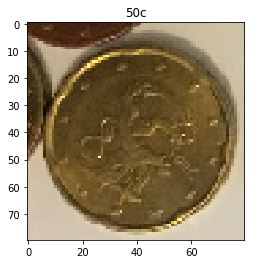

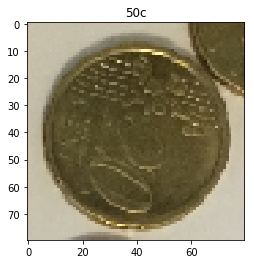

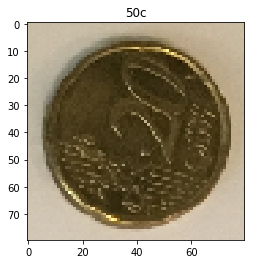

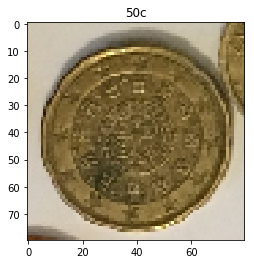

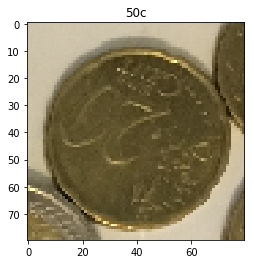

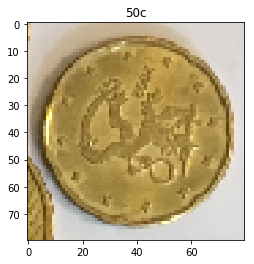

442 19 4.298642533936651


In [4]:
class_to_label = dict((v, k) for k,v, in {'10c': 0, '20c': 3, '50c': 6, '2e': 5, '1c': 1, '1e': 2, '2c': 4, '5c': 7}.items())
count = X.shape[0]
wrong = 0
for ix in range(predictions.shape[0]):
    if(class_to_label[predictions[ix]]==Y[ix]):
        continue
    wrong = wrong+1
#    plt.subplot(10,3,wrong)
    plt.title(class_to_label[predictions[ix]])
    plt.imshow(X[ix])
    plt.show()
print(count, wrong, wrong/count*100)

In [5]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

Shape of conv: (20, 20, 64)


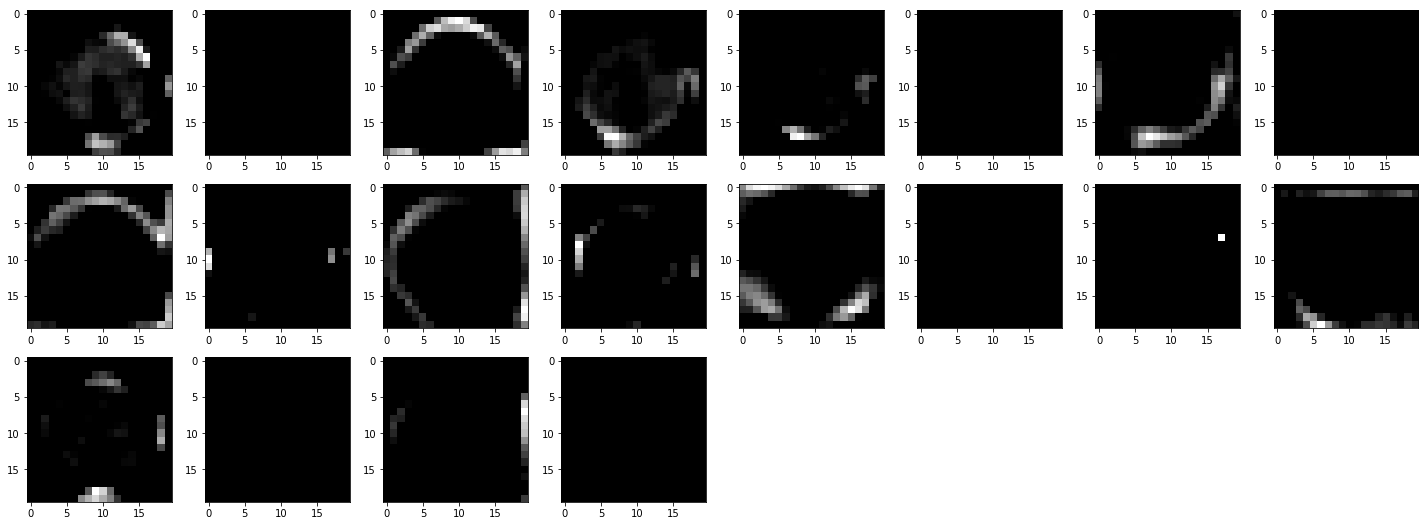

In [6]:
def layer_to_visualize(layer, x):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(x)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(25,25))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

# Specify the layer to want to visualize
x = np.expand_dims(X[324], axis=0)
layer_to_visualize(model.layers[6], x)